# Decision Trees
## Imports + Turning the labels into numbers for easier classification

In [1]:
'''
Import cell
'''

import pandas as pd
from collections import Counter 
from collections import defaultdict
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn import tree
from id3 import Id3Estimator
from sklearn.model_selection import GridSearchCV

In [2]:
'''
Convert the labels to numeric values

@param  ndarray  The labels
@return ndarray  The converted labels
'''
def numeric_labels(data):
    labels = []
    for label in data:
        if label == 'sitting':
            labels.append(0)
        elif label == 'lift':
            labels.append(1)
        elif label =='towlift':
            labels.append(2)
        elif label =='standing':
            labels.append(3)
        elif label =='lying':
            labels.append(4)
        elif label =='snowboarding':
            labels.append(5)
    return np.asarray(labels)


## Loading in the data and readying variables for training

In [3]:
'''
Data retrieval cell
'''

# get the data sets
preprocessed_train_split_feat = pd.read_csv("preprocessed_train_split_feat.csv")
train_label = pd.read_csv("train_split_label.csv")

# get the labels
preprocessed_validation_split_feat= pd.read_csv("preprocessed_validation_split_feat.csv")
validation_split_label = pd.read_csv("validation_split_label.csv")

In [4]:
'''
Variable assignment cell
'''

# set the variables that will be used for by the ML algorithm
X = preprocessed_train_split_feat
y = numeric_labels(train_label.Label)
Xt = preprocessed_validation_split_feat
control = numeric_labels(validation_split_label.Label)

## Using gridsearch to find the best parameters for the ID3 decision tree, training and running the algorithm

In [5]:
parameters = {'max_depth':list(range(1,11)), 'min_samples_split':list(range(1,21)), 'prune':(True, False), 'gain_ratio':(True, False), 'is_repeating':(True, False)}
scores= 'accuracy'
clf = GridSearchCV(Id3Estimator(), parameters, cv=5, scoring=scores, n_jobs=-1)
clf.fit(X, y)

/home/kaj/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Id3Estimator(gain_ratio=False, is_repeating=False, max_depth=None,
       min_entropy_decrease=0.0, min_samples_split=2, prune=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'prune': (True, False), 'gain_ratio': (True, False), 'is_repeating': (True, False)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [6]:
control = numeric_labels(validation_split_label.Label)
pred_id3_grids = clf.predict(Xt)

print("Best Score:", clf.best_score_)
print("Best params:", clf.best_params_)

Best Score: 0.5169082125603864
Best params: {'gain_ratio': True, 'is_repeating': True, 'max_depth': 9, 'min_samples_split': 20, 'prune': True}


In [7]:
## 16 metrics
### HR,BR,Posture,Activity,PeakAccel,ECGAmplitude,ECGNoise,HRConfidence,ROGState,ROGTime,VerticalMin,VerticalPeak,LateralMin,LateralPeak,SagittalMin,SagittalPeak

# Best Score: 0.5314009661835749
# Best params: {'gain_ratio': False, 'is_repeating': True, 'max_depth': 4, 'min_samples_split': 5, 'prune': True}


# Best Score: 0.5314009661835749
# Best params: {'gain_ratio': True, 'is_repeating': True, 'max_depth': 7, 'min_samples_split': 12, 'prune': True}

# Best Score: 0.5024154589371981
# Best params: {'gain_ratio': True, 'is_repeating': True, 'max_depth': 10, 'min_samples_split': 40, 'prune': True}


## 4 metrics (hr br posture activity)
### HR,BR,Posture,Activity

# Best Score: 0.5217391304347826
# Best params: {'gain_ratio': False, 'is_repeating': True, 'max_depth': 14, 'min_samples_split': 13, 'prune': True}

## 5 metrics
### HR,BR,Posture,Activity,PeakAccel

# Best Score: 0.5217391304347826
# Best params: {'gain_ratio': False, 'is_repeating': True, 'max_depth': 8, 'min_samples_split': 6, 'prune': True}


## 11 metrics
### HR,BR,Posture,Activity,PeakAccel,VerticalMin,VerticalPeak,LateralMin,LateralPeak,SagittalMin,SagittalPeak

# Best Score: 0.5458937198067633
# Best params: {'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0, 'min_samples_split': 2, 'random_state': 2}


## Using gridsearch to find the best parameters for the sklearn decision tree classifier, training and running the model

In [8]:
parameters = {'max_depth':list(range(1,7)), 'min_samples_split':list(range(2,11)), 'min_impurity_decrease':[0, 0.01, 0.1, 0,2, 1], 'random_state':list(range(0,10)), 'criterion':['entropy', 'gini']}
scores= 'accuracy'
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv=5, scoring=scores, n_jobs=-1)
clf.fit(X, y)
print(clf.cv_results_)


{'mean_fit_time': array([0.00276632, 0.00348506, 0.0027916 , ..., 0.00163584, 0.00150247,
       0.00165505]), 'std_fit_time': array([1.09204392e-04, 1.55188326e-03, 5.27052932e-04, ...,
       3.11325370e-05, 4.79072040e-04, 1.78120693e-04]), 'mean_score_time': array([0.00112429, 0.00098958, 0.00109739, ..., 0.00078049, 0.00069284,
       0.00070763]), 'std_score_time': array([1.18130437e-04, 2.35949491e-04, 2.09886331e-04, ...,
       1.12253139e-04, 2.17107681e-04, 2.19681730e-05]), 'param_criterion': masked_array(data=['entropy', 'entropy', 'entropy', ..., 'gini', 'gini',
                   'gini'],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[1, 1, 1, ..., 6, 6, 6],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_min_impurity_decrease': masked_array(data=[0, 0, 0, ..., 1, 1, 1],
             mask=[

/home/kaj/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [9]:
control = numeric_labels(validation_split_label.Label)
pred_des = clf.predict(Xt)


print("Best Score:", clf.best_score_)
print("Best params:", clf.best_params_)

Best Score: 0.5942028985507246
Best params: {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 2, 'random_state': 3}


(0, 16)

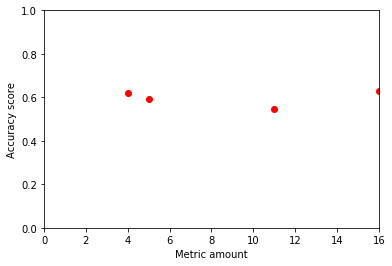

In [10]:
metric_amount = [4, 5, 11, 16]
accuracy_p_metric = [0.6183574879227053, 0.5942028985507246, 0.5458937198067633,  0.6280193236714976]

fig, ax1 = plt.subplots()
ax1.set_xlabel('Metric amount')
ax1.set_ylabel('Accuracy score')
ax1.plot(metric_amount, accuracy_p_metric , 'ro')
ax1.set_ylim(0, 1)
ax1.set_xlim(0, 16)
# ax1.tick_params(axis='y', labelcolor=color)


In [11]:
## 16 metrics
### HR,BR,Posture,Activity,PeakAccel,ECGAmplitude,ECGNoise,HRConfidence,ROGState,ROGTime,VerticalMin,VerticalPeak,LateralMin,LateralPeak,SagittalMin,SagittalPeak

# Best Score: 0.6280193236714976
# Best params: {'criterion': 'entropy', 'max_depth': 3, 'min_impurity_decrease': 0.1, 'min_samples_split': 2, 'random_state': 1}


## 4 metrics 
### HR,BR,Posture,Activity

# Best Score: 0.6183574879227053
# Best params: {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 2, 'random_state': 5}


## 5 metrics
### HR,BR,Posture,Activity,PeakAccel

# Best Score: 0.5942028985507246
# Best params: {'criterion': 'entropy', 'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 2, 'random_state': 3}


## 11 metrics 
### HR,BR,Posture,Activity,PeakAccel,VerticalMin,VerticalPeak,LateralMin,LateralPeak,SagittalMin,SagittalPeak

# Best Score: 0.5458937198067633
# Best params: {'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0, 'min_samples_split': 2, 'random_state': 2}
